# Shape of loss functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
t = np.arange(-3,3,0.01)

In [3]:
def hinge_loss(t):
    """Hinge loss is used by the Support Vector Machine"""
    return np.maximum(0, 1-t)

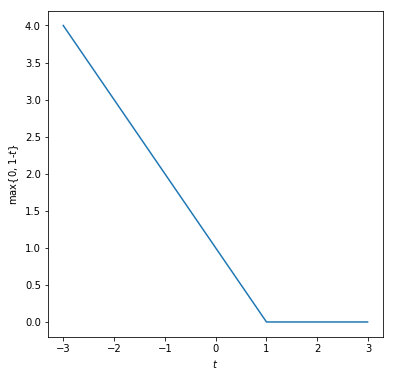

In [4]:
loss = hinge_loss(t)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(t, loss)
ax.set_xlabel('$t$')
ax.set_ylabel('max{0, 1-$t$}')
plt.savefig('hinge_loss.pdf')

# Smoothing

If we are interested in applying gradient methods such as L-BFGS, and do not want to resort to subgradient methods, we need to smooth the kink in the hinge loss. The approach we take here is to compute the conjugate of the hinge loss, then add a proximal term ($\ell_2$ penalty), and then compute the conjugate of that to obtain the smooth primal hinge loss.

Recall that the hinge loss is given by
$$
L(\alpha) = \max\{0, 1-\alpha\}
$$
The convex conjugate of $L(\alpha)$ is
\begin{align}
L^*(\beta) &= \sup_{\alpha\in\mathbb{R}} \left\{ \alpha\beta - \max\{0, 1-\alpha\} \right\}\\
&=
    \begin{cases}
       \beta & \mathrm{if}\quad -1\leqslant \beta \leqslant 0,\\
       \infty & \mathrm{otherwise}
    \end{cases}
\end{align}
The smoothed conjugate is
$$
L_\gamma^*(\beta) = L^*(\beta) + \frac{\gamma}{2} \beta^2.
$$
The corresponding primal smooth hinge loss is given by
\begin{align}
L_\gamma(\alpha) &=\sup_{-1\leqslant \beta\leqslant 0} \left\{ \alpha\beta- \beta - \frac{\gamma}{2}\beta^2 \right\}\\
&=
    \begin{cases}
        1-\alpha-\frac{\gamma}{2}&\mathrm{if}\quad \alpha < 1-\gamma,\\
        \frac{(\alpha-1)^2}{2\gamma}&\mathrm{if}\quad 1-\gamma \leqslant \alpha \leqslant 1,\\
        0&\mathrm{if}\quad \alpha > 1.
    \end{cases}
\end{align}
$L_\gamma(\alpha)$ is convex and differentiable with the derivative
$$
L_\gamma'(\alpha) =
\begin{cases}
    -1&\mathrm{if}\quad \alpha < 1-\gamma,\\
    \frac{\alpha-1}{\gamma}&\mathrm{if}\quad 1-\gamma\leqslant \alpha\leqslant 1,\\
    0&\mathrm{if}\quad \alpha > 1.
\end{cases}
$$